# Домашняя работа №1

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

import matplotlib
from matplotlib import pyplot as plt
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['figure.figsize'] = [10, 7]
warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

Угол между векторами х и у: 45.0 угол между векторами x и z: 45.0


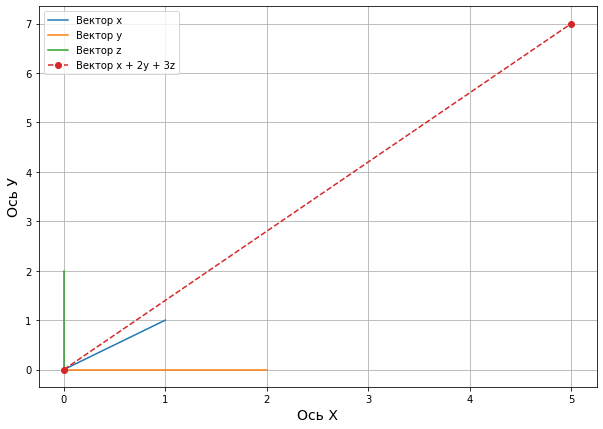

In [2]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

# Рисуем вектор x + 2y + 3z
g = x+2*y+3*z
plt.plot([0, x[0]], [0, x[1]], label='Вектор x')
plt.plot([0, y[0]], [0, y[1]], label='Вектор y')
plt.plot([0, z[0]], [0, z[1]], label='Вектор z')
plt.plot([0, g[0]], [0, g[1]], marker ='o', linestyle='--', label='Вектор x + 2y + 3z')
plt.grid()
plt.xlabel('Ось Х', fontsize=14)
plt.ylabel('Ось У', fontsize=14)
plt.legend(loc=0)

# Находим углы между векторами

# x_mod = math.sqrt(x[0]**2 + x[1]**2)
x_mod = np.linalg.norm(x)
y_mod = np.linalg.norm(y)
z_mod = np.linalg.norm(z)

cos_xy = np.dot(x, y)/(x_mod*y_mod)
cos_xz = np.dot(x, z)/(x_mod*z_mod)

degree_xy = round(math.degrees(math.acos(cos_xy)), 2)
degree_xz = round(math.degrees(math.acos(cos_xz)), 2)

print('Угол между векторами х и у:', degree_xy, 'угол между векторами x и z:', degree_xz)

## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

Расстояние отправой кисти до позвоночника: 0.39


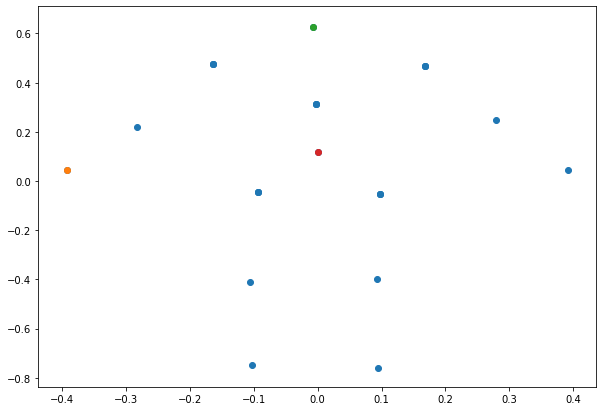

In [49]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])
a = np.array(df.x)
b = np.array(df.y)
c = np.array(df.z)

plt.scatter(a, b)
plt.scatter(a[0], b[0])
plt.scatter(a[10], b[10])
plt.scatter(a[14], b[14])

# Вектор правой руки
y = np.array([a[10]-a[0], b[10]-b[0]])
# Вектор позвоночника
v = np.array([a[14]-a[10], b[14]-b[10]])
# Проекция руки на позвоночник
x = np.dot(y, v)/np.linalg.norm(v)
dist = math.sqrt(np.linalg.norm(y)**2 - x**2)

print(f'Расстояние отправой кисти до позвоночника: {round(dist, 2)}')


# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy и решение по алгоритму на бумажке). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [16]:
m1 = np.array([[2, 2],
               [1, 3]])
m1_vals, m1_vecs = np.linalg.eig(m1)

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

m2_vals, m2_vecs = np.linalg.eig(m2)

# Numpy почему-то подбирает значения таковые, чтобы суммы квадратов были равны единице, хотя на смысл не влияет

In [19]:
print(f'Собственные значения матрицы m1:{m1_vals}')
print(f'Собственные векторы матрицы m1:{m1_vecs}')
print()
print(f'Собственные значения матрицы m2:{m2_vals}')
print(f'Собственные векторы матрицы m2:{m2_vecs}')

Собственные значения матрицы m1:[1. 4.]
Собственные векторы матрицы m1:[[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]

Собственные значения матрицы m2:[3. 6. 3.]
Собственные векторы матрицы m2:[[-0.81649658  0.57735027 -0.27658128]
 [ 0.40824829  0.57735027  0.8035929 ]
 [-0.40824829 -0.57735027  0.52701162]]
